# ELC-144x142x79-GMTED-STD

Initial conditions `EXPERIMENTS/LMDZ/CREATE_clim_360d/config.card` with the new elevation file from GMTED2010 (`/gpfsstore/rech/goe/ufz23bm/topo/Relief_GMTED2010_15n015_00625deg.nc` from http://www.temis.nl/data/gmted2010/) and the additionnal variables ZMEA_NOT_FILTERED and ZSTD_NOT_FILTERED (https://github.com/mickaellalande/SCA_parameterization/compare/test).

- Jean-Zay WORK: `/gpfswork/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/ELC-144x142x79-GMTED-STD`
- Jean-Zay STORE: `/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD` 
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/IGCM_OUT/LMDZ/catalog.html

## Import modules

In [9]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


## Define paths

In [10]:
path_boundary = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Boundary/'
path_grid = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Grid/'
path_restart = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79-GMTED-STD/ATM/Output/Restart/'

## Open startphy.nc
To check the new variables `ZMEA_NOT_FILTERED` and `ZSTD_NOT_FILTERED`

/!\ startphy is on physics grid so it is needed to convert to dynamics grid before visualyzing! /!\

In [11]:
startphy = xr.open_dataset(path_restart+'ELC-144x142x79-GMTED-STD_clim_startphy.nc')
grid = xr.open_dataset(path_grid+'ELC-144x142x79-GMTED-STD_grilles_gcm.nc')

In [14]:
# startphy

In [15]:
# grid

In [17]:
zmea = u.phys2dyn(startphy.ZMEA, grid)
zmea_not_filtered = u.phys2dyn(startphy.ZMEA_NOT_FILTERED, grid)

zstd = u.phys2dyn(startphy.ZSTD, grid)
zstd_not_filtered = u.phys2dyn(startphy.ZSTD_NOT_FILTERED, grid)

## Global plot of ZMEA and ZSTD

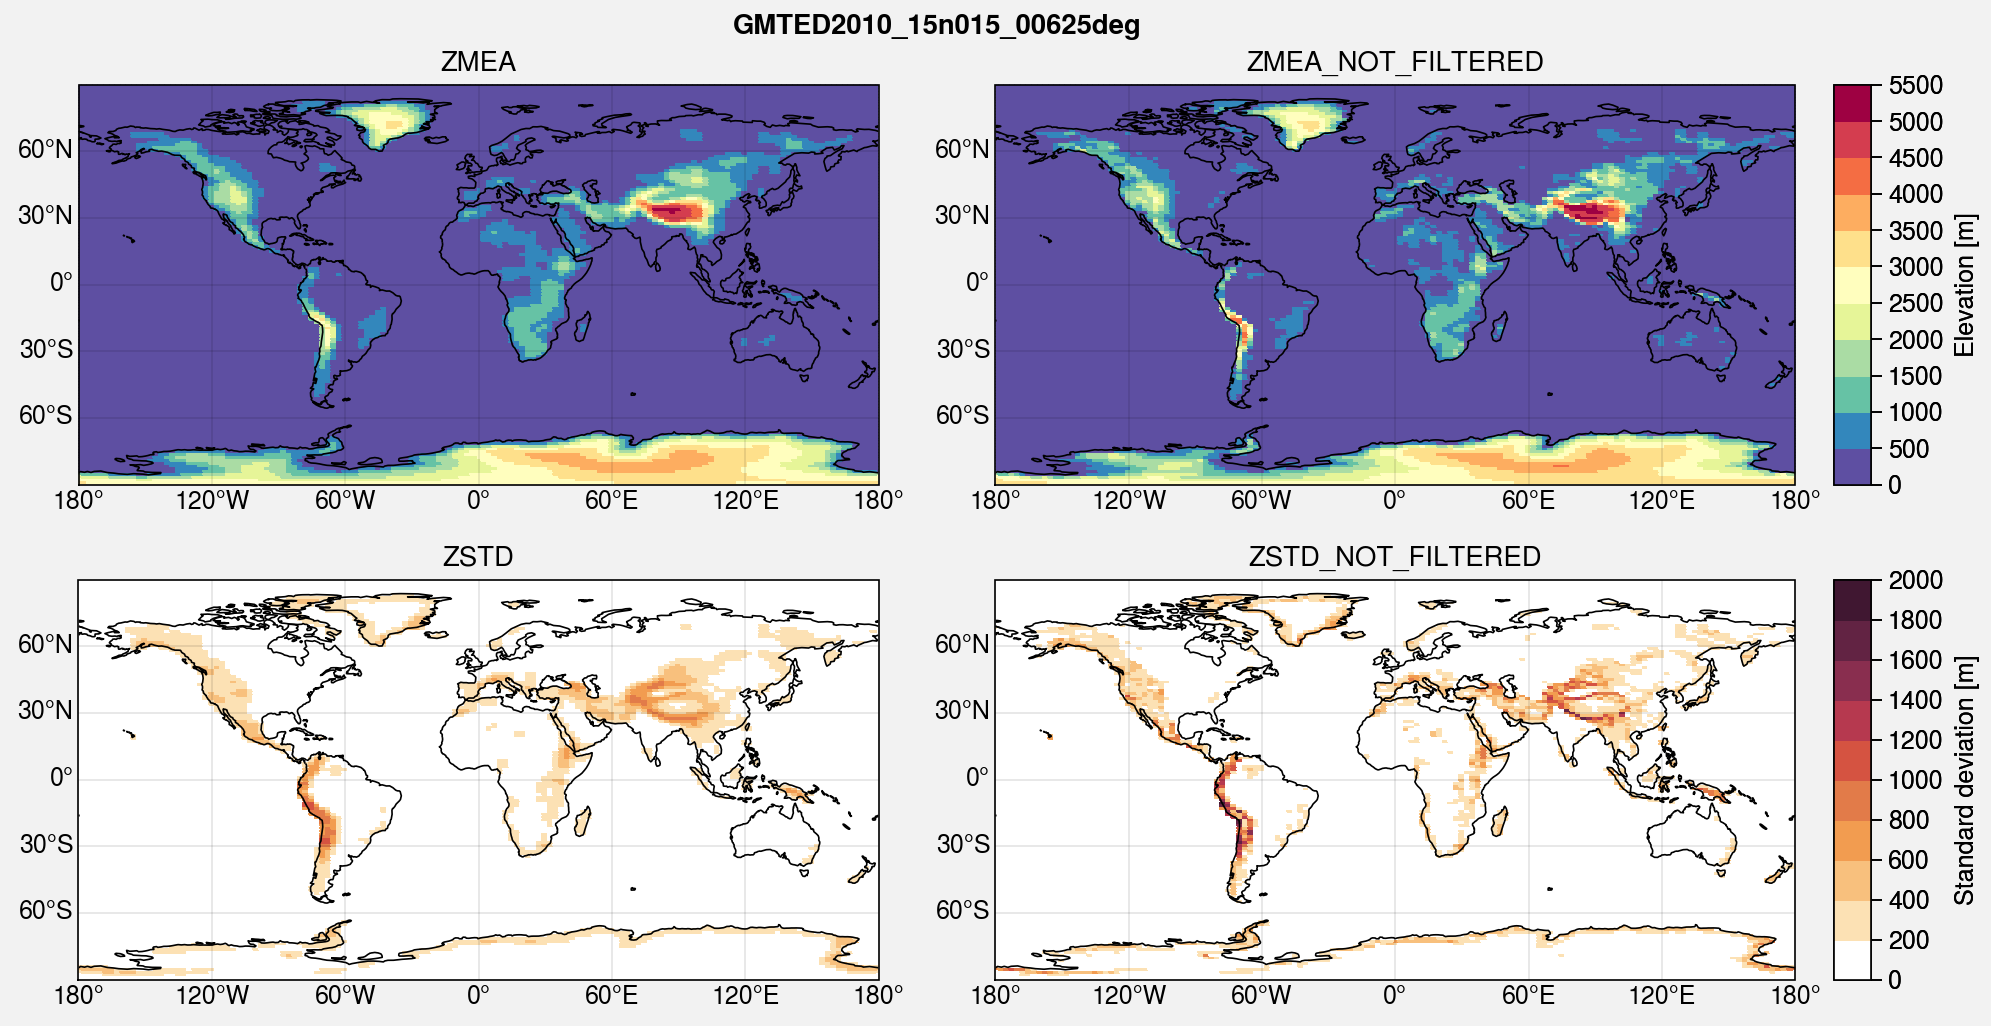

In [34]:
fig, axs = plot.subplots(nrows=2, ncols=2, proj='cyl', axwidth=4)

# ZMEA
levels=plot.arange(0,5500,500)
cmap='Spectral_r'

axs[0].pcolormesh(zmea, levels=levels, cmap=cmap)
axs[0].format(title='ZMEA')

m = axs[1].pcolormesh(zmea_not_filtered, levels=levels, cmap=cmap)
axs[1].format(title='ZMEA_NOT_FILTERED')

axs[1].colorbar(m, label='Elevation [m]')

# ZSTD
levels=plot.arange(0,2000,200)
cmap='Fire'

axs[2].pcolormesh(zstd, levels=levels, cmap=cmap)
axs[2].format(title='ZSTD')

m = axs[3].pcolormesh(zstd_not_filtered, levels=levels, cmap=cmap)
axs[3].format(title='ZSTD_NOT_FILTERED')

axs[3].colorbar(m, label='Standard deviation [m]')

# Format
axs.format(
    labels=True, coast=True,
    suptitle='GMTED2010_15n015_00625deg'
)

for ext in ['jpg', 'png', 'pdf']:
    fig.save('img/zmea_zstd_GLOB.'+ext)

Il faudra faire attention à bien regarder les biais sur les Andes également où la STD est très importante !

Possibilités :
- https://nsidc.org/data/NSIDC-0321/versions/1
- https://globalcryospherewatch.org/reference/snow_inventory.php

## HMA plot of ZMEA and ZSTD

In [31]:
latlim, lonlim = u.get_domain_HMA()

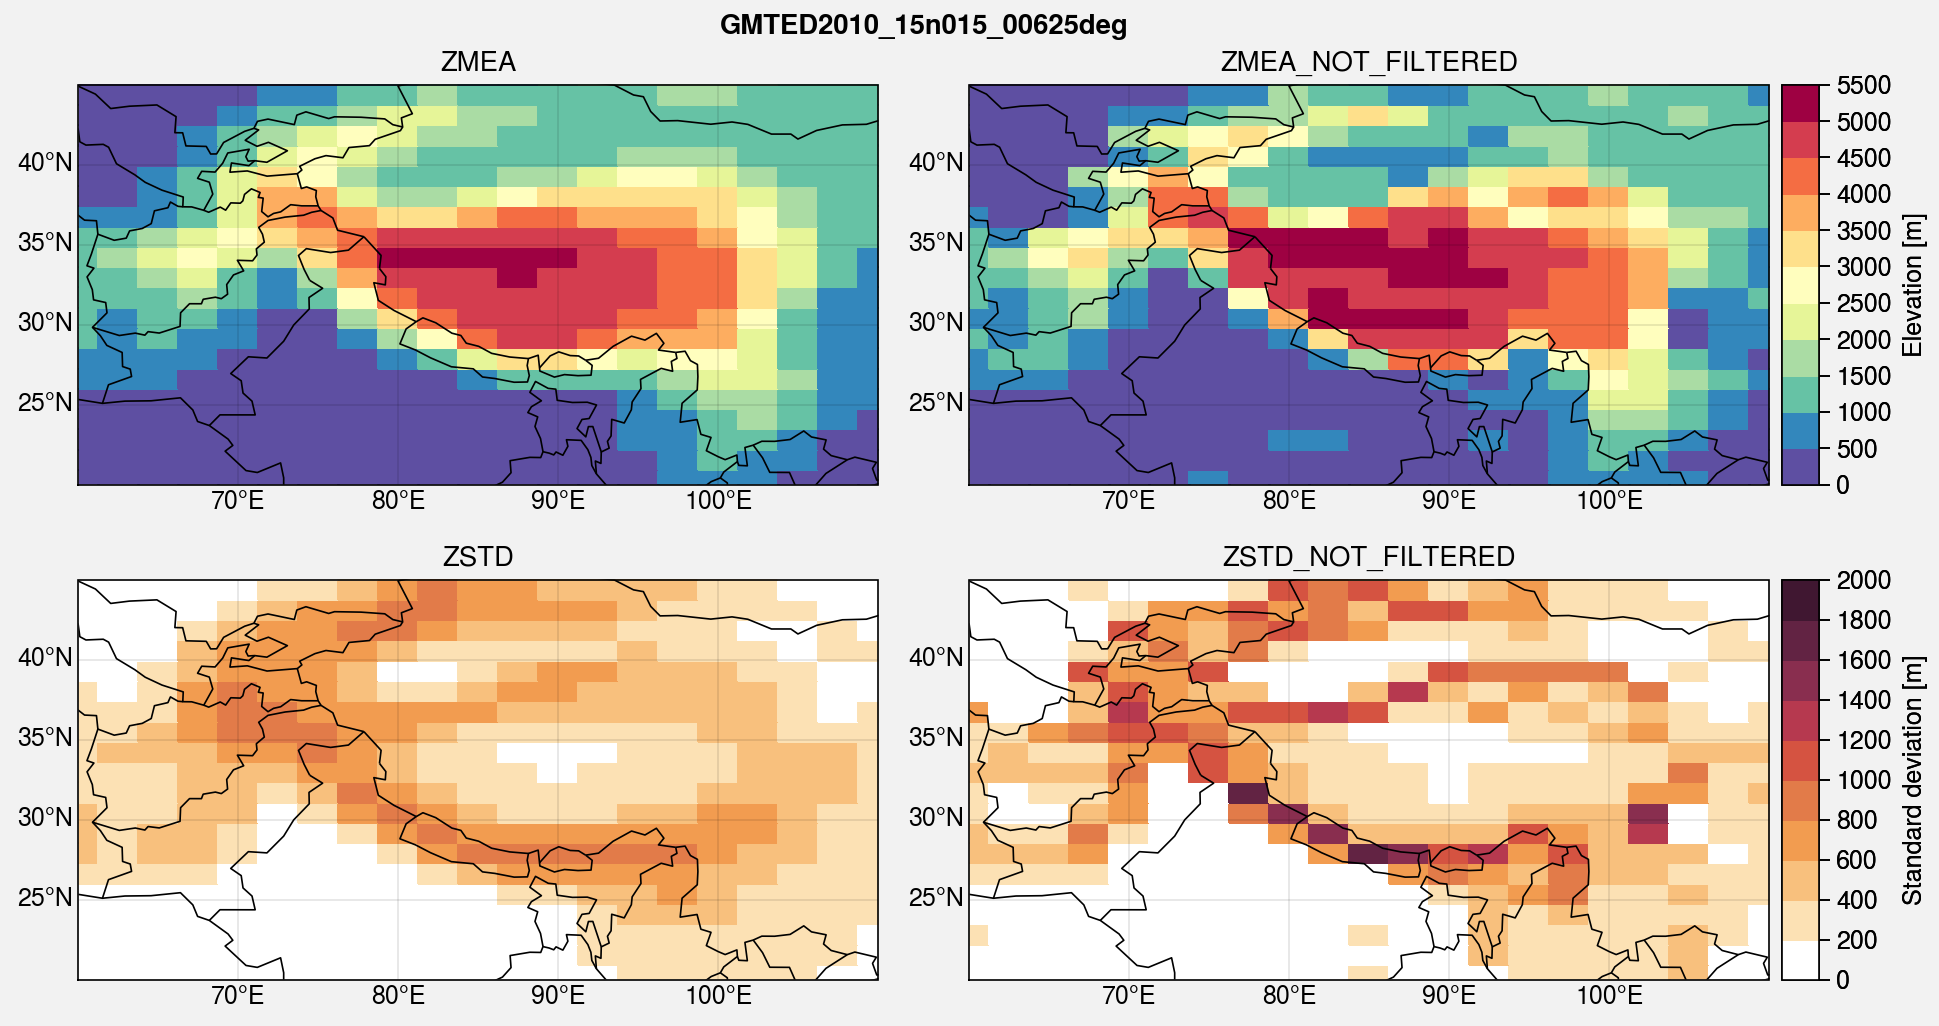

In [35]:
fig, axs = plot.subplots(nrows=2, ncols=2, proj='cyl', axwidth=4)

# ZMEA
levels=plot.arange(0,5500,500)
cmap='Spectral_r'

axs[0].pcolormesh(zmea, levels=levels, cmap=cmap)
axs[0].format(title='ZMEA')

m = axs[1].pcolormesh(zmea_not_filtered, levels=levels, cmap=cmap)
axs[1].format(title='ZMEA_NOT_FILTERED')

axs[1].colorbar(m, label='Elevation [m]')

# ZSTD
levels=plot.arange(0,2000,200)
cmap='Fire'

axs[2].pcolormesh(zstd, levels=levels, cmap=cmap)
axs[2].format(title='ZSTD')

m = axs[3].pcolormesh(zstd_not_filtered, levels=levels, cmap=cmap)
axs[3].format(title='ZSTD_NOT_FILTERED')

axs[3].colorbar(m, label='Standard deviation [m]')

# Format
axs.format(
    labels=True, coast=True, borders=True,
    suptitle='GMTED2010_15n015_00625deg',
    latlim=(latlim.start,latlim.stop), lonlim=(lonlim.start,lonlim.stop)
)

for ext in ['jpg', 'png', 'pdf']:
    fig.save('img/zmea_zstd_HMA.'+ext)